In [43]:
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
from matplotlib.colors import LinearSegmentedColormap


In [42]:

images_path = {'3': "floorplan_images/L_3.png",
               '4':"floorplan_images/L_4.png",
               '5': 'floorplan_images/L_5.jpg',
               '6':"loorplan_images/L_6.jpg",
               '6Chinese':"floorplan_images/L_6Chinese.jpg"}
regions_coordinates = {'3':{'Discussion.Cubicles':[[4103,5450,522,748]],'Soft.seats':[[1738,811,187,330],[1969,3542,621,1215],[4356,5467,192,330],[4488,5456,2860,3014]],
                            'Moveable.seats':[[4367,5362,1050,2090]]},
                       '4':{'Soft.seats':[[1166,1639,682,1155],[2178,2656,1309,1721],[3228,3822,792,902],[4625,5098,1639,2530],[4537,5175,2799,2909]],
                             'Sofa':[[1039,1749,1375,1584], [2909, 3987,1364,1606]]},
                       '5':{'Windowed.Seats':[[36 ,1220,40,132],[40, 128,136,1308],[144,1224,1212,1304],[1240,4532,780,900],[1912,2668,2396,2528],[44,1912,2840,2960],[4720,5548,784,904],[5548,5688,784,2948],[4720,5548,2836,2948]],
                             'X4.man.tables':[[288,1068,196,316],[1304,1568,368,736],[212,1004,2140,2260],[1432,1704,2144,2264],[2160,2136,2432,2264]],
                             'X8.man.tables':[[1992,3904,1024,1188],[1300,1828,2528,2700]]},
                        '6':{'Diagonal.Seats':[[624,2007,348,492]],
                             'Cubicle.seats':[[144,519,300,507], [1614,1986,675,1356]],
                             'Windowed.Seats':[[150,2292,63,159],[2250,2355,267,1404] ,[1803,2283,1491,1587]]},
                        '6Chinese':{'Diagonal.Seats':[[610,2342,918,1084]],
                                    'Cubicle.seats':[[710,2342,1252,1340]],
                                    'Windowed.Seats':[[208,300,756,1314],[630,2860,2022,2100],[2982,3074,1022,1992]]}}


students = {'Windowed.Seats':20, 'X4.man.tables':40,'X8.man.tables':80}



In [45]:
def blur_img(contour_data):
    contour_blur = cv2.GaussianBlur(contour_data, ksize=(251,251), sigmaX=25, sigmaY=25)
    return contour_blur
    

In [59]:

# Get the directory where the script is located
script_dir = os.path.dirname(os.path.abspath())

# Construct the path to the image relative to the script's directory
image_path = os.path.join(script_dir, 'floorplan_images', 'L_5.jpg')

# Load the image
image = cv2.imread(image_path)


        
        

NameError: name '__file__' is not defined

In [40]:
image = cv2.imread(images_path['5'])
region = regions_coordinates['5']

def z_data(region,students,contour_data):
        for type in region:
                for coordinates in region[type]:
                        x_1 = coordinates[0]
                        x_2 = coordinates[1]
                        y_1 = coordinates[2]
                        y_2 = coordinates[3]
                        for x in range(x_1,x_2 +1):
                                for y in range(y_1, y_2 +1):
                                        contour_data[y,x] = students[type]
        return contour_data  


def generate_floorplan_contour(image, region, students):
        x_range = np.arange(image.shape[1])
        y_range = np.arange(image.shape[0])
        xx,yy = np.meshgrid(x_range,y_range)
        contour_data = np.zeros_like(xx, dtype=np.float32)
        contour_data = z_data(region,students,contour_data)
        contour_data = blur_img(contour_data) 
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.imshow(image)
        # Create a colormap for the contour plot
        cmap = LinearSegmentedColormap.from_list('custom_colormap', [(0, 'white'), (1, 'blue')], N=256)
        contours = ax.pcolormesh(xx, yy, contour_data, cmap= cmap, alpha=0.5)
        ax.set_title('Contour Plot')
        plt.show()




[ WARN:0@12104.937] global loadsave.cpp:248 findDecoder imread_('floorplan_images/L_5.jpg'): can't open/read file: check file path/integrity


In [33]:
generate_floorplan_contour(image, regions, students)

AttributeError: 'NoneType' object has no attribute 'shape'

In [122]:
'''from scipy.stats import multivariate_normal
regions = {'a':[476,844,154,291], 'b':[1000,1280,120,650]}
students ={'a':40, 'b':'80'}
image = plt.imread('/Users/yg/Downloads/floorplan images/Level 3.png')
def z_data(region, student,contour_data):
        x_1 = region[0]
        x_2 = region[1]
        y_1 = region[2]
        y_2 = region[3]
        for x in range(x_1,x_2 +1):
                for y in range(y_1, y_2 +1):
                        contour_data[y,x] = multivariate_normal([0, 0], [[10.0, 2.], [2., 10.0]]) 
        return contour_data  


def generate_floorplan_contour(image, regions, students):
        x_range = np.arange(image.shape[1])
        y_range = np.arange(image.shape[0])
        xx,yy = np.meshgrid(x_range,y_range)
        contour_data = np.zeros_like(xx, dtype=np.float32)
        for region in regions.values():
                for student in students.values():
                        contour_data = z_data(region,student,contour_data)
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.imshow(image)
        # Create a colormap for the contour plot
        cmap = LinearSegmentedColormap.from_list('custom_colormap', [(0, 'white'), (1, 'blue')], N=256)
        contours = ax.pcolormesh(xx, yy, contour_data, cmap= cmap, alpha=0.5)
        ax.set_title('Contour Plot')
        plt.show()

generate_floorplan_contour(image, regions, students)'''

TypeError: float() argument must be a string or a real number, not 'multivariate_normal_frozen'

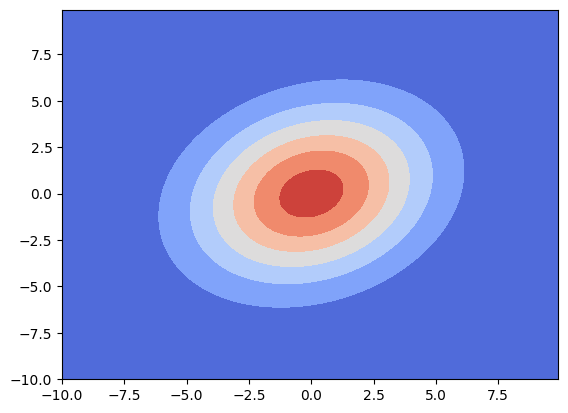

AttributeError: 'multivariate_normal_frozen' object has no attribute 'dtypes'

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

x, y = np.mgrid[-10:10:.1, -10:10:.1]
rv = multivariate_normal([0, 0], [[10.0, 2.], [2., 10.0]])
data = np.dstack((x, y))
z = rv.pdf(data)
plt.contourf(x, y, z, cmap='coolwarm')
plt.show()
rv.dtypes